In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import glob

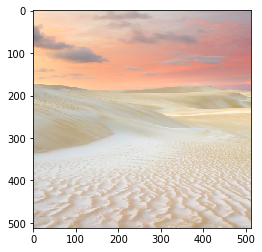

In [50]:
img_list = glob.glob(r'D:\corpor_download\grid_problem_samples\*')
img_list1 = glob.glob(r'D:\corpor_download\g_new carw\*')
# ------
i = 0
# ------
fileName = img_list1[i]
img = cv2.imread(fileName)
img = cv2.resize(img,(512,512))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


## 浮雕滤镜

In [51]:
kernel = np.array([[-1, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]], dtype=np.float32)

dst_v = cv2.filter2D(img, -1, kernel)

dst_h = cv2.filter2D(img, -1, kernel.T)
# 横向并排对比显示
cv2.imshow('edge', np.hstack((img, dst_v, dst_h)))
cv2.waitKey(0)

-1

## 水彩

In [6]:
import cv2
import numpy as np

def oilPainting(img, templateSize, bucketSize, step):#templateSize模板大小,bucketSize桶阵列,step模板滑动步长
 
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray = ((gray/256)*bucketSize).astype(int)                          #灰度图在桶中的所属分区
    h,w = img.shape[:2]
     
    oilImg = np.zeros(img.shape, np.uint8)                              #用来存放过滤图像
     
    for i in range(0,h,step):
        
        top = i-templateSize
        bottom = i+templateSize+1
        if top < 0:
            top = 0
        if bottom >= h:
            bottom = h-1
            
        for j in range(0,w,step):
            
            left = j-templateSize
            right = j+templateSize+1
            if left < 0:
                left = 0
            if right >= w:
                right = w-1
                
            # 灰度等级统计
            buckets = np.zeros(bucketSize,np.uint8)                     #桶阵列，统计在各个桶中的灰度个数
            bucketsMean = [0,0,0]                                       #对像素最多的桶，求其桶中所有像素的三通道颜色均值
            #对模板进行遍历
            for c in range(top,bottom):
                for r in range(left,right):
                    buckets[gray[c,r]] += 1                         #模板内的像素依次投入到相应的桶中，有点像灰度直方图
    
            maxBucket = np.max(buckets)                                 #找出像素最多的桶以及它的索引
            maxBucketIndex = np.argmax(buckets)
            
            for c in range(top,bottom):
                for r in range(left,right):
                    if gray[c,r] == maxBucketIndex:
                        bucketsMean += img[c,r]
            bucketsMean = (bucketsMean/maxBucket).astype('uint8')           #三通道颜色均值
            
            # 油画图
            for m in range(step):
                for n in range(step):
                    oilImg[m+i,n+j] = (bucketsMean[0],bucketsMean[1],bucketsMean[2])
    return  oilImg
    


img = cv2.imread(fileName, cv2.IMREAD_ANYCOLOR)
img = cv2.resize(img,(512,512))
oil = oilPainting(img,4,8,2)
cv2.imshow('youhua',oil)
cv2.imwrite(r'C:\Users\x\Desktop\97.jpg',oil)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
img_list[6]

'D:\\corpor_download\\grid_problem_samples\\test_20190828013632_0.5291815596026749.png'

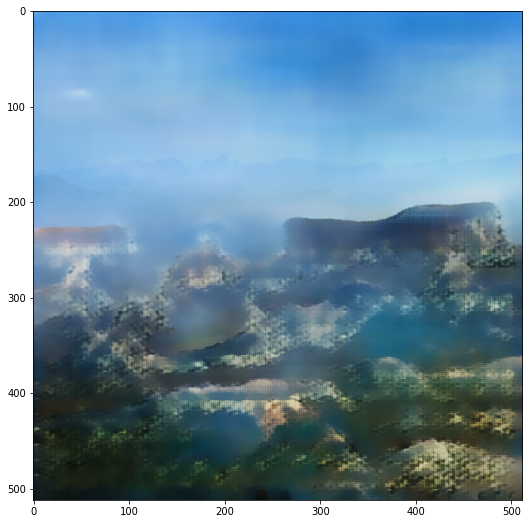

In [45]:
img = cv2.imread(img_list[2],cv2.IMREAD_ANYCOLOR) # (前景)
img1 = cv2.imread(img_list1[15],cv2.IMREAD_ANYCOLOR) # 背景(底色)

img = cv2.bilateralFilter(img,15,50,50)
img1 = cv2.bilateralFilter(img1,15,50,50)

img = cv2.resize(img, (512,512), interpolation=cv2.INTER_CUBIC)
img2 = cv2.resize(img1, (512,512), interpolation=cv2.INTER_CUBIC)
d = 0.84
img3 = d*(img/255)+(1-d)*(img2/255)
img4 = img3*255
img4 = img4.astype('uint8')
# cv2.imshow('youhua',img3)
plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))